# AI 기반 산불 규모 예측 서비스
컴퓨터공학과 이경묵

In [1]:
# Jupyter notebook 경고 메시지 숨기기
from warnings import filterwarnings
filterwarnings(action="ignore")

In [2]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 전처리
### 데이터 불러오기

In [3]:
fires = pd.read_csv("./sanbul/sanbul-5.csv")

### 데이터 확인

In [4]:
fires.head()

,latitude,longitude,month,day,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
0,37.814760,126.934555,12-Dec,04-thu,-11.2,-7.5,8.4,2.3,0.03
1,37.902374,127.531013,11-Nov,02-tue,2.6,11.2,5.9,0.8,0.10
2,37.815010,127.303115,03-Mar,05-fri,13.2,21.5,5.7,1.3,0.50
3,37.645414,127.504775,02-Feb,06-sat,-4.0,1.1,10.4,2.5,0.30
4,37.811693,127.514488,06-Jun,00-sun,23.0,32.1,6.7,1.7,0.08


In [5]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        456 non-null    float64
 1   longitude       456 non-null    float64
 2   month           456 non-null    object 
 3   day             456 non-null    object 
 4   avg_temp        456 non-null    float64
 5   max_temp        456 non-null    float64
 6   max_wind_speed  456 non-null    float64
 7   avg_wind        456 non-null    float64
 8   burned_area     456 non-null    float64
dtypes: float64(7), object(2)
memory usage: 32.2+ KB


In [6]:
fires.describe()

,latitude,longitude,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,37.554922,127.152073,9.810088,17.717763,7.692982,1.601316,0.282675
std,0.289899,0.267260,8.278386,8.878393,2.073081,0.581168,0.596268
min,36.878411,126.447779,-15.400000,-10.600000,3.600000,0.500000,0.010000
25%,37.339854,126.934403,5.075000,12.475000,6.100000,1.200000,0.020000
50%,37.561472,127.176612,9.500000,17.800000,7.400000,1.500000,0.100000
75%,37.786237,127.343083,14.800000,23.925000,8.800000,1.900000,0.300000
max,38.178624,127.743580,30.200000,36.800000,16.600000,3.900000,7.000000


### 데이터 시각화

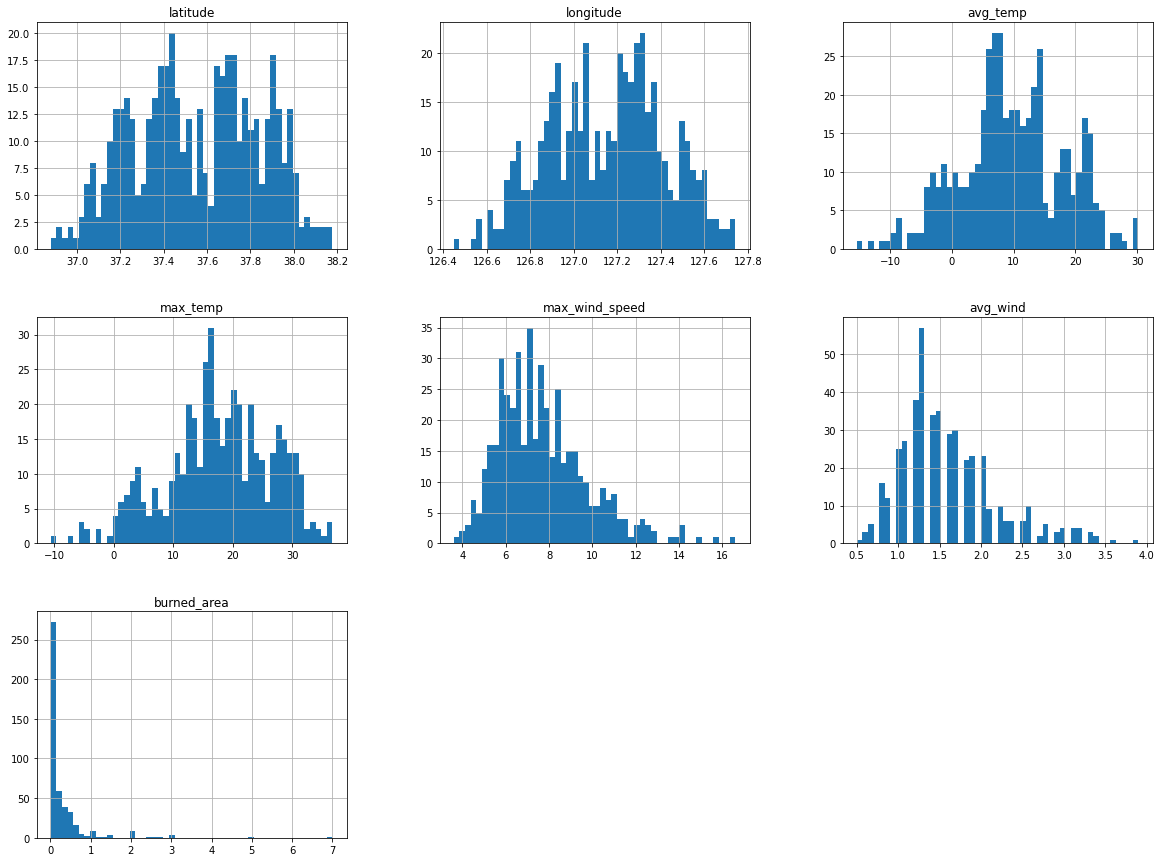

In [7]:
fires.hist(bins=50, figsize=(20, 15))
plt.show()

### 테스트 세트 분리
산불이 발생한 달을 기반으로 계층 샘플링을 진행한다.

In [8]:
# 월간 발생한 산불의 비율
fires["month"].value_counts() / len(fires)

03-Mar    0.375000
04-Apr    0.219298
02-Feb    0.098684
06-Jun    0.087719
05-May    0.081140
01-Jan    0.032895
11-Nov    0.030702
12-Dec    0.019737
09-Sep    0.017544
10-Oct    0.017544
08-Aug    0.010965
07-Jul    0.008772
Name: month, dtype: float64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(fires, fires["month"]):
    train_set = fires.loc[train_index]
    test_set = fires.loc[test_index]

In [10]:
# train set에서 월간 발생한 산불의 비율
train_set["month"].value_counts() / len(train_set)

03-Mar    0.376374
04-Apr    0.219780
02-Feb    0.098901
06-Jun    0.087912
05-May    0.082418
01-Jan    0.032967
11-Nov    0.030220
12-Dec    0.019231
09-Sep    0.016484
10-Oct    0.016484
08-Aug    0.010989
07-Jul    0.008242
Name: month, dtype: float64

In [11]:
# test set에서 월간 발생한 산불의 비율
test_set["month"].value_counts() / len(test_set)

03-Mar    0.369565
04-Apr    0.217391
02-Feb    0.097826
06-Jun    0.086957
05-May    0.076087
11-Nov    0.032609
01-Jan    0.032609
09-Sep    0.021739
10-Oct    0.021739
12-Dec    0.021739
08-Aug    0.010870
07-Jul    0.010870
Name: month, dtype: float64

### 여러 특성에 대해 산점도그래프 출력하기

array([[<AxesSubplot:xlabel='burned_area', ylabel='burned_area'>,
        <AxesSubplot:xlabel='max_temp', ylabel='burned_area'>,
        <AxesSubplot:xlabel='avg_temp', ylabel='burned_area'>,
        <AxesSubplot:xlabel='max_wind_speed', ylabel='burned_area'>],
       [<AxesSubplot:xlabel='burned_area', ylabel='max_temp'>,
        <AxesSubplot:xlabel='max_temp', ylabel='max_temp'>,
        <AxesSubplot:xlabel='avg_temp', ylabel='max_temp'>,
        <AxesSubplot:xlabel='max_wind_speed', ylabel='max_temp'>],
       [<AxesSubplot:xlabel='burned_area', ylabel='avg_temp'>,
        <AxesSubplot:xlabel='max_temp', ylabel='avg_temp'>,
        <AxesSubplot:xlabel='avg_temp', ylabel='avg_temp'>,
        <AxesSubplot:xlabel='max_wind_speed', ylabel='avg_temp'>],
       [<AxesSubplot:xlabel='burned_area', ylabel='max_wind_speed'>,
        <AxesSubplot:xlabel='max_temp', ylabel='max_wind_speed'>,
        <AxesSubplot:xlabel='avg_temp', ylabel='max_wind_speed'>,
        <AxesSubplot:xlabel='max_wind

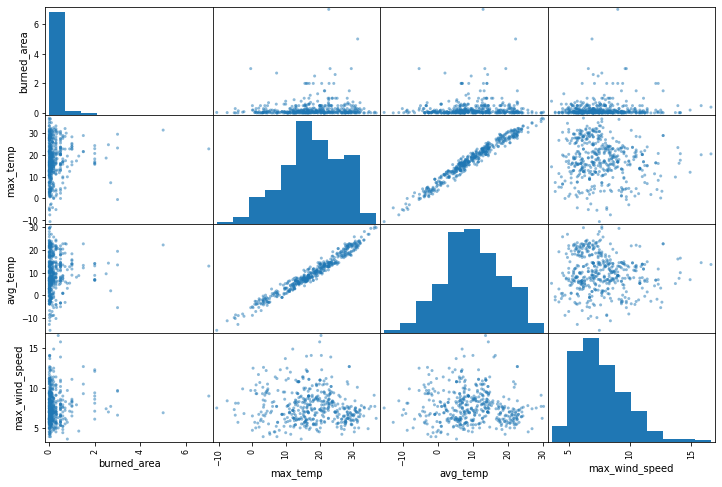

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(fires[["burned_area", "max_temp", "avg_temp", "max_wind_speed"]], figsize=(12, 8))

### 지역별로 산불 범위에 대해 산점도그래프 그리기

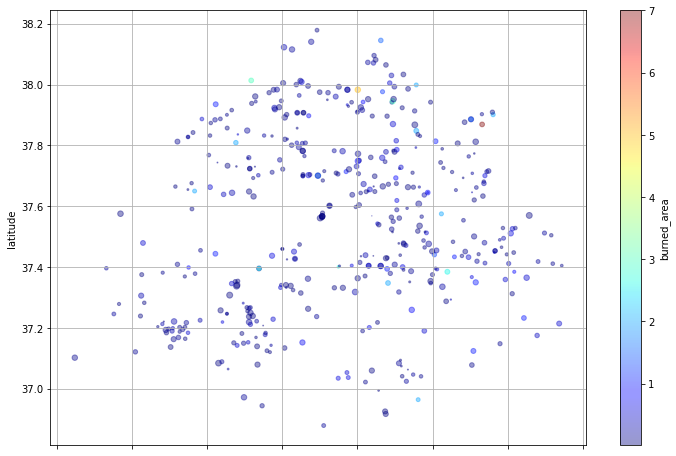

In [13]:
fires.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
           s=fires["max_temp"], c="burned_area", cmap=plt.get_cmap("jet"),
           colorbar=True, figsize=(12, 8))
plt.grid(True)

### 타깃 클래스에 대한 상관계수 조사

In [14]:
corr_matrix = fires.corr()
corr_matrix["burned_area"].sort_values(ascending=False)

burned_area       1.000000
longitude         0.104925
max_temp          0.092222
latitude          0.080654
avg_temp          0.065841
max_wind_speed    0.060394
avg_wind          0.018909
Name: burned_area, dtype: float64

### 특성들 인코딩

In [15]:
train_y = train_set["burned_area"].copy()
train_x = train_set.drop(["burned_area"], axis=1)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

_num_attribs = ["avg_temp", "max_temp", "max_wind_speed", "avg_wind",]
_cat_attribs = ["month", "day"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, _num_attribs),
    ("cat", OneHotEncoder(), _cat_attribs)
])

train_x = full_pipeline.fit_transform(train_x)

마찬가지로 테스트 셋에도 같이 적용해 준다.

In [17]:
test_x = test_set.drop(["burned_area"], axis=1)
test_y = test_set["burned_area"].copy()

test_x = full_pipeline.transform(test_x)

## 2. 모델 개발

> 1. SGD Regression
> 2. Support Vector Machine
> 3. Decision Tree
> 4. Random Forest

위 4가지 모델에 대해 다음을 구하시오

> - `GridSearchCV`를 통해 Best 모델 구하기
> - `mean_squared_error`를 이용해 training set에 대해 RMSE 구하기
> - 각 모델에 대한 학습 곡선 그리기
> - `cross_val_score`를 이용하여 RMSE Score 추력하기
> - `mean_squared_error`이용해여 test set에 대해 RMSE 구하기

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error

In [19]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []

    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_pred))
        val_error.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_error), "r-", label="train")
    plt.plot(np.sqrt(val_error), "b-", label="val")
    plt.legend(loc="best")
    plt.grid(True)

### 2.1 SGDRegression
`GridSearchCV`를 이용해 최선의 모델 찾기

In [20]:
from sklearn.linear_model import SGDRegressor
estimator = SGDRegressor()

In [21]:
estimator.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [22]:
param_grid = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2],
}

In [23]:
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [24]:
grid_search.fit(train_x, train_y)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0,
                                   100.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'alpha': 0.01}

training set에 대해 RMSE 구하기

In [26]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(train_x), train_y)
np.sqrt(sgd_mse)

0.612312092216952

학습 곡선 그리기

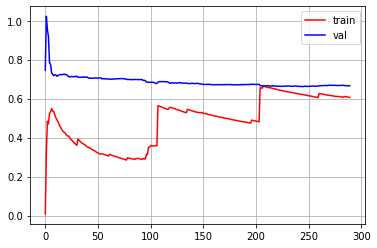

In [27]:
plot_learning_curve(grid_search.best_estimator_, train_x, train_y)
plt.show()

test set에 대해 RMSE 구하기

In [28]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(test_x), test_y)
np.sqrt(sgd_mse)

0.4365284064311544

### 2.2 Support Vector Machine
`GridSearchCV`를 이용해 최선의 모델 찾기

In [29]:
from sklearn.svm import LinearSVR
estimator = LinearSVR()

In [30]:
estimator.get_params().keys()

dict_keys(['C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose'])

In [31]:
param_grid = {
    "epsilon": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2],
}

In [32]:
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [33]:
grid_search.fit(train_x, train_y)

GridSearchCV(estimator=LinearSVR(),
             param_grid={'epsilon': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0,
                                     100.0]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_params_

{'epsilon': 0.1}

training set에 대해 RMSE 구하기

In [35]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(train_x), train_y)
np.sqrt(sgd_mse)

0.6363471485114358

학습 곡선 그리기

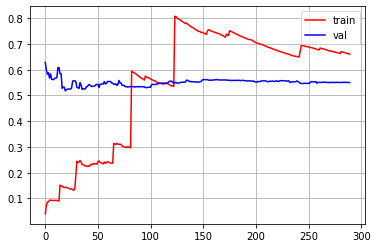

In [36]:
plot_learning_curve(grid_search.best_estimator_, train_x, train_y)
plt.show()

test set에 대해 RMSE 구하기

In [37]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(test_x), test_y)
np.sqrt(sgd_mse)

0.4330502770222304

### 2.3 Decision Tree
`GridSearchCV`를 이용해 최선의 모델 찾기

In [38]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor()

In [39]:
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [40]:
param_grid = {
    "max_depth": list(range(1, 10)),
}

In [41]:
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [42]:
grid_search.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_depth': 1}

training set에 대해 RMSE 구하기

In [44]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(train_x), train_y)
np.sqrt(sgd_mse)

0.6205349841991787

학습 곡선 그리기

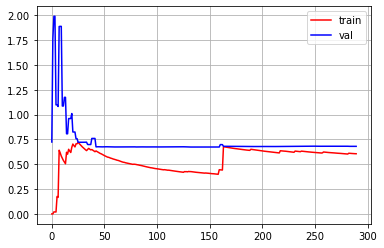

In [45]:
plot_learning_curve(grid_search.best_estimator_, train_x, train_y)
plt.show()

test set에 대해 RMSE 구하기

In [46]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(test_x), test_y)
np.sqrt(sgd_mse)

0.4379899430661549

### 2.4 Random Forest
`GridSearchCV`를 이용해 최선의 모델 찾기

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
estimator = BaggingRegressor(DecisionTreeRegressor())

In [48]:
estimator.get_params().keys()

dict_keys(['base_estimator__ccp_alpha', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [49]:
param_grid = {
    "n_estimators": list(range(1, 100)),
}

In [50]:
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [51]:
grid_search.fit(train_x, train_y)

GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'n_estimators': 40}

training set에 대해 RMSE 구하기

In [53]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(train_x), train_y)
np.sqrt(sgd_mse)

0.2594206978623211

학습 곡선 그리기

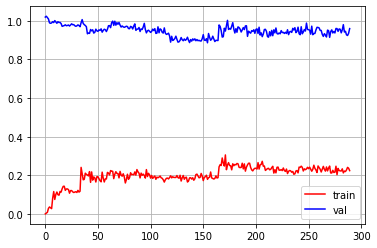

In [54]:
plot_learning_curve(grid_search.best_estimator_, train_x, train_y)
plt.show()

test set에 대해 RMSE 구하기

In [55]:
sgd_mse = mean_squared_error(grid_search.best_estimator_.predict(test_x), test_y)
np.sqrt(sgd_mse)

0.5557264420095135

## Keras 모델 개발


In [56]:
# to array
train_x = train_x.toarray()
train_y = train_y.to_numpy()

test_x = test_x.toarray()
test_y = test_y.to_numpy()

In [57]:
import tensorflow as tf
from tensorflow import keras

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
history = model.fit(train_x, train_y, epochs=200, verbose=0, validation_split=0.1)

### 러닝 커브 확인하기

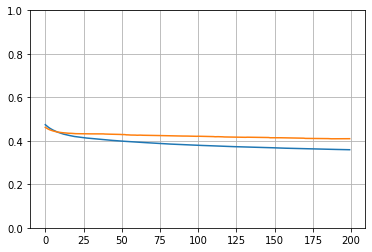

In [61]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 모델 저장하기
아래와 같이 모델을 저장할 수 있다.

In [62]:
import os

model_ver = "0001"
model_name = "my_model"
model_path = os.path.join(model_name, model_ver)
tf.saved_model.save(model, model_path)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: my_model\0001\assets
